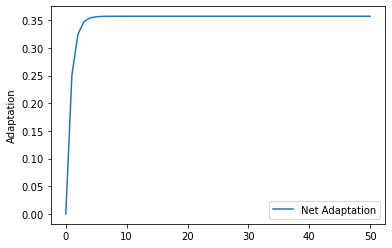

In [2]:
import matplotlib.pyplot as plt
import torch
# Set the number of trials to simulate
num_trials = 50

# Set the initial value for the state variable
x = 0

# Set the learning rate
A = 0.8
B = 0.5

# Set the target position for the experiment
target_position = 0.5

# Create an empty list to store the values of x(n) on each trial
x_list = []
x_list.append(x)
# Simulate the progression of x(n) over the specified number of trials
for n in range(num_trials):

    # Compute the error on this trial
    e = target_position - x

    # Compute x(n+1) according to the learning rule
    x = A * x + B * e

    # Store the value of x(n) in the list
    x_list.append(x)

# Print the final value of x(n)
# print("Final value of x(n):", x_list[-1])
# print(x_list)
plt.plot(x_list, label="Net Adaptation")
plt.ylabel("Adaptation")
plt.legend()
plt.show()

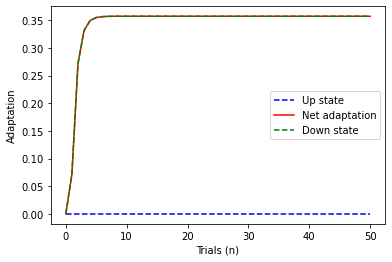

In [3]:
import matplotlib.pyplot as plt

# Set the number of trials to simulate
num_trials = 50

# Set the initial values for the gain-specific model
x1 = 0
x2 = 0
A = 0.8
B = 0.5

# Set the target position for the experiment
target_position = 0.5

# Create empty lists to store the values of x1(n), x2(n), and x(n) on each trial
x1_list = []
x1_list.append(x1)
x2_list = []
x2_list.append(x2)
x_list = []
x_list.append(x1+x2)
# Simulate the progression of motor output for the gain-specific model
for n in range(num_trials):

    # Compute the error on this trial
    e = target_position - x

    # Compute x1(n+1) and x2(n+1) according to the learning rules
    x1 = min(0, (A * x1 + B * e))
    x2 = max(0, (A * x2 + B * e))

    # Compute x(n+1) as the sum of x1(n+1) and x2(n+1)
    x = x1 + x2

    # Store the values of x1(n), x2(n), and x(n) in the lists
    x1_list.append(x1)
    x2_list.append(x2)
    x_list.append(x)
# Plot the progression of x1(n), x2(n), and x(n) over the trials
plt.plot(x1_list, "b--", label="Up state")#range(num_trials), 
plt.plot(x_list, "r-", label="Net adaptation")
plt.plot(x2_list, "g--", label="Down state")
plt.xlabel("Trials (n)")
plt.ylabel("Adaptation")
plt.legend()
plt.show()


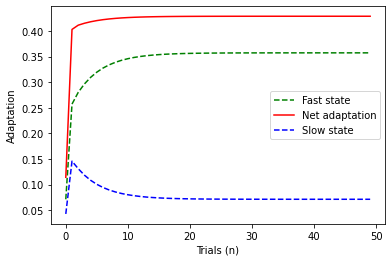

[0.11428571428571427, 0.4028571428571428, 0.41114285714285714, 0.4148857142857143, 0.41779714285714287, 0.42008885714285715, 0.4218931142857143, 0.42331360285714287, 0.4244319511428572, 0.4253124248857143, 0.4260056203971429, 0.4265513720688571, 0.42698104145111426, 0.42731931944020285, 0.4275856451376512, 0.42779532291571887, 0.42796040188119866, 0.42809036827580166, 0.42819269060182935, 0.4282732487987055, 0.4283366721329461, 0.42838660521836985, 0.4284259174533664, 0.42845686791050935, 0.42848123515387393, 0.428500419443994, 0.4285155232036565, 0.42852741436848524, 0.42853677626275166, 0.42854414686651643, 0.42854994973058563, 0.4285545183158034, 0.4285581151553368, 0.42856094694111146, 0.4285631764013358, 0.42856493165165754, 0.4285663135573127, 0.42856740152933354, 0.4285682580878937, 0.42856893245502165, 0.42856946338313845, 0.42856988138196045, 0.428570210471737, 0.4285704695635699, 0.42857067354613865, 0.4285708341412752, 0.42857096057755883, 0.4285710601206343, 0.4285711384907

In [4]:
import matplotlib.pyplot as plt

# Set the number of trials to simulate
num_trials = 50

# Set the initial values for the gain-specific model
x1 = 0
x2 = 0
Af = 0.9
As = 0.7
Bf = 0.5
Bs = 0.3

# Set the target position for the experiment
target_position = 0.5

# Create empty lists to store the values of x1(n), x2(n), and x(n) on each trial
x1_list = []

x2_list = []

x_list = []

# Simulate the progression of motor output for the gain-specific model
for n in range(num_trials):

    # Compute the error on this trial
    e = target_position - x

    # Compute x1(n+1) and x2(n+1) according to the learning rules
    x1 = Af * x1 + Bf * e
    x2 = As * x2 + Bs * e

    # Compute x(n+1) as the sum of x1(n+1) and x2(n+1)
    x = x1 + x2

    # Store the values of x1(n), x2(n), and x(n) in the lists
    x1_list.append(x1)
    x2_list.append(x2)
    x_list.append(x)
# Plot the progression of x1(n), x2(n), and x(n) over the trials
plt.plot(x1_list, "g--", label="Fast state")#range(num_trials), 
plt.plot(x_list, "r-", label="Net adaptation")
plt.plot(x2_list, "b--", label="Slow state")
plt.xlabel("Trials (n)")
plt.ylabel("Adaptation")
plt.legend()
plt.show()

print(x_list)

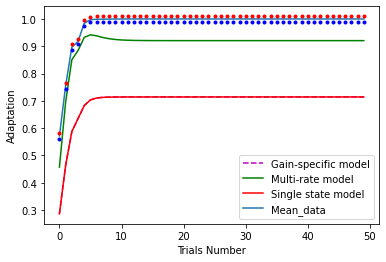

In [5]:
import numpy as np
import random
random.seed(10)
from scipy.stats import sem
import matplotlib.pyplot as plt
# Set the number of trials to simulate
num_trials = 50
data_list=[]
upper_list=[]
lower_list=[]
last_value=0

Af = 0.9
As = 0.7
Bf = 0.5
Bs = 0.3
A = 0.8
B = 0.5
x_g,x_m,x_s=0,0,0
x1_m,x2_m,x1_g,x2_g=0,0,0,0
for n in range(num_trials):
    data=random.uniform(last_value, 1)
    data_list.append(data)#generate mean data randomly
    last_value=data
for n in range(num_trials):
    upper_bound=data_list[n]+sem(data_list)
    lower_bound=data_list[n]-sem(data_list)
    upper_list.append(upper_bound)
    lower_list.append(lower_bound)
    
x1_list_m = []
x2_list_m = []
x_list_m = []
    
x1_list_g = []
x2_list_g = []
x_list_g = []

x_list_s = []
# Simulate the progression of motor output for the gain-specific model
for n in range(num_trials):

    # Compute the error on this trial
    e_m = data_list[n] - x_m
    e_g = data_list[n] - x_g
    e_s = data_list[n] - x_s

    # Compute x1(n+1) and x2(n+1) according to the learning rules
    x1_m = Af * x1_m + Bf * e_m
    x2_m = As * x2_g + Bs * e_m
    x1_g = min(0, (A * x1_g + B * e_g))
    x2_g = max(0, (A * x2_g + B * e_g))
    x_s = A * x_s + B * e_s
    # Compute x(n+1) as the sum of x1(n+1) and x2(n+1)
    x_m = x1_m + x2_m
    x_g = x1_g + x2_g

    # Store the values of x1(n), x2(n), and x(n) in the lists
    x1_list_m.append(x1_m)
    x2_list_m.append(x2_m)
    x_list_m.append(x_m)
    
    x1_list_g.append(x1_g)
    x2_list_g.append(x2_g)
    x_list_g.append(x_g)

    x_list_s.append(x_s)
plt.plot(x_list_g, "m--", label="Gain-specific model")
plt.plot(x_list_m, "g-", label="Multi-rate model")
plt.plot(x_list_s, "r-", label="Single state model")
plt.plot(data_list,'-', label='Mean_data')
plt.plot(upper_list,'r.')
plt.plot(lower_list,'b.')
plt.xlabel("Trials Number")
plt.ylabel("Adaptation")
plt.legend()
plt.show()

In [6]:

data_index=[i for i in range(50)]
data_index_t=torch.tensor(data_index, dtype=torch.float)
data_list_t=torch.tensor(data_list, dtype=torch.float)
print(data_index_t)
print(data_list_t)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49.])
tensor([0.5714, 0.7552, 0.8967, 0.9180, 0.9847, 0.9973, 0.9991, 0.9992, 0.9996,
        0.9997, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [7]:
import pyro
import torch
import pyro.distributions as dist

def model(x, y):
    alpha = pyro.sample("alpha", dist.Normal(0, 1))
    beta = pyro.sample("beta", dist.Normal(0, 1))
    sigma = pyro.sample("sigma", dist.Uniform(0, 10))

    mean = alpha + beta * x

    with pyro.plate("data", 50):
        return pyro.sample("obs", dist.Normal(mean, sigma), obs=y)
# pyro.render_model(model, model_args=(data_index_t, data_list_t), render_distributions=True)

In [8]:
def guide(x,y):
    
    alpha_q = pyro.param("alpha_q", torch.tensor(1.0))
    beta_q = pyro.param("beta_q", torch.tensor(1.0))
    sigma_q = pyro.param("sigma_q", torch.tensor(1.0))
    sigma=pyro.sample("y", dist.Normal(alpha_q + beta_q * x, sigma_q))
    
    alpha_scale = pyro.param('alpha_scale', lambda: torch.tensor(1.),
                         constraint=constraints.positive)
    beta_scale = pyro.param('beta_scale', lambda: torch.tensor(1.),
                         constraint=constraints.positive)
    alpha = pyro.sample("alpha", dist.Normal(alpha_q, alpha_scale))
    beta = pyro.sample("beta", dist.Normal(beta_q, beta_scale))
    
    
    return {"alpha": alpha, "beta": beta, "sigma": sigma}

In [9]:
import logging
auto_guide = pyro.infer.autoguide.AutoNormal(model)
adam = pyro.optim.Adam({"lr": 0.02})  # Consider decreasing learning rate.
elbo = pyro.infer.Trace_ELBO()
svi = pyro.infer.SVI(model, auto_guide, adam, elbo)

losses = []
for step in range(500):  # Consider running for more steps.
    loss = svi.step(data_index_t, data_list_t)
    losses.append(loss)
    if step % 100 == 0:
        logging.info("Elbo loss: {}".format(loss))

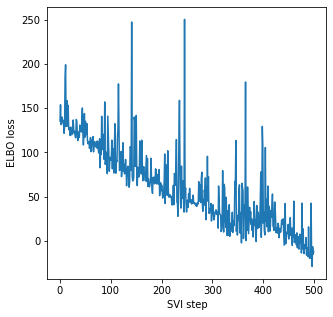

In [10]:
plt.figure(figsize=(5, 5))
plt.plot(losses)
plt.xlabel("SVI step")
plt.ylabel("ELBO loss");

In [11]:
for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name).data.cpu().numpy())

AutoNormal.locs.alpha 0.92303956
AutoNormal.scales.alpha 0.04984102
AutoNormal.locs.beta 0.0028457497
AutoNormal.scales.beta 0.0032761802
AutoNormal.locs.sigma -3.9357777
AutoNormal.scales.sigma 0.15415098
